# DAT210x - Programming with Python for DS

## Module6- Lab5

In [44]:
import pandas as pd

from sklearn import tree
from sklearn.model_selection import train_test_split

from subprocess import call

Useful information about the dataset used in this assignment can be [found here](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names).

Load up the mushroom dataset into dataframe `X` and verify you did it properly, and that you have not included any features that clearly shouldn't be part of the dataset.

You should not have any doubled indices. You can check out information about the headers present in the dataset using the link we provided above. Also make sure you've properly captured any NA values.

In [45]:
X = pd.read_csv("Datasets/agaricus-lepiota.data", names = ['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], na_values = "?") 

In [46]:
# An easy way to show which rows have nans in them:
X[pd.isnull(X).any(axis=1)]

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3984,e,x,y,b,t,n,f,c,b,e,...,s,e,w,p,w,t,e,w,c,w
4023,p,x,y,e,f,y,f,c,n,b,...,s,w,w,p,w,o,e,w,v,p
4076,e,f,y,u,f,n,f,c,n,h,...,f,w,w,p,w,o,f,h,y,d
4100,p,x,y,e,f,y,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
4104,p,x,y,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,l
4196,p,x,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
4200,p,x,y,n,f,y,f,c,n,b,...,k,p,w,p,w,o,e,w,v,l
4283,e,f,s,p,t,n,f,c,b,e,...,s,w,w,p,w,t,e,w,c,w
4291,e,k,s,p,t,n,f,c,b,e,...,s,w,e,p,w,t,e,w,c,w
4326,e,x,y,r,f,n,f,c,n,p,...,f,w,w,p,w,o,f,h,v,d


For this simple assignment, just drop any row with a nan in it, and then print out your dataset's shape:

In [47]:
X.dropna(axis = 0, inplace = True)

Copy the labels out of the dataframe into variable `y`, then remove them from `X`.

Encode the labels, using the `.map()` trick we presented you in Module 5, using `canadian:0`, `kama:1`, and `rosa:2`.

In [48]:
y = X.classes
X.drop(labels = ['classes'], inplace = True, axis = 1)
y = y.map({'e' : 0, 'p' : 1})

Encode the entire dataframe using dummies:

Split your data into `test` and `train` sets. Your `test` size should be 30% with `random_state` 7.

Please use variable names: `X_train`, `X_test`, `y_train`, and `y_test`:

In [49]:
X = pd.get_dummies(X, columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

In [75]:
X.columns[31]

'gill-size_b'

Create an DT classifier. No need to set any parameters:

In [51]:
DT = tree.DecisionTreeClassifier()

Train the classifier on the `training` data and labels; then, score the classifier on the `testing` data and labels:

In [52]:
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)

In [53]:
print("High-Dimensionality Score: ", round((score*100), 3))

High-Dimensionality Score:  100.0


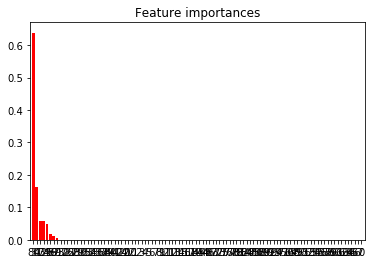

In [73]:
import numpy as np
import matplotlib.pyplot as plt

importances = DT.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
#print("Feature ranking:")

#for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [74]:
indices

array([80, 31, 43, 74, 25, 96, 87, 91, 97, 32, 26, 27, 28, 29, 30, 35, 33,
       34, 23, 36, 37, 38, 39, 40, 41, 42, 24, 20, 22, 10,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 11, 21, 12, 13, 14, 15, 16, 17, 18, 19, 45, 44,
       48, 46, 83, 72, 73, 75, 76, 77, 78, 79, 81, 82, 84, 47, 85, 86, 88,
       89, 90, 92, 93, 94, 95, 71, 70, 69, 68, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,  0], dtype=int64)

Use the code on the course's SciKit-Learn page to output a .DOT file, then render the .DOT to .PNGs.

You will need graphviz installed to do this. On macOS, you can `brew install graphviz`. On Windows 10, graphviz installs via a .msi installer that you can download from the graphviz website. Also, a graph editor, gvedit.exe can be used to view the tree directly from the exported tree.dot file without having to issue a call. On other systems, use analogous commands.

If you encounter issues installing graphviz or don't have the rights to, you can always visualize your .dot file on the website: http://webgraphviz.com/.

In [ ]:
tree.export_graphviz(DT.tree_, out_file = "tree.dot", feature_names = X.columns)

In [ ]:
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])